# Investment Strategy: A low-volatility and momentum strategy with LSTM neural network 1-day

# Victor Bustos & Marcus Nunes

## Initial Exploratory Analysis

Based on LSTM stock prediction values, we calculate 1-day future returns, analysing SP&500 stocks and selecting the desired stocks to add to the portfolio through a 'low-volatility-momentum' strategy. First we analyze the data history to find a value to the maximum volatility accepted, then we analyze the momentum scores of the stocks using three different periods (21-days, 63-month and 126-month momentum scores), selecting a reasonable momentum threshold in accordance to the distributions of these scores, thereafter selecting some interesting stocks. The final momentum score is calculated by using a weighted momentum average of weigths 0.4 for 21-days momentum and 0.3 for 63-days and 126-days momentum and must be greater than the momentum threshold. We pre-select the stocks to be invested based upon these two criterias: they must pass the volatility and momentum tests and then we get the best 10 stocks momentum scores (this number of stocks can vary if more stocks are necessary).

In this test we chose volatility and momentum thresholds as 0.2 and log(1.1), respectively. The reason for the last choice is that it captures all stocks with an average appreciation of 10%.

  A momentum strategy is a strategy to buy past winners and to sell past losers. It's a bet on the ability of past returns to predict future returns - academic literature has documented evidence that momentum profits are significantly positive and pervasive across multiple time periods.

c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vol_df[f'{column}'] = np.nan_to_num(log_returns[column].rolling(volatility_window).std())
c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  momentum_scores_21[f'{column}'] = np.nan_to_num(momentum_scores)
c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:56: PerformanceWarning: DataFrame is highl

Maximum volatility:  0.04608641287225426
Selected stocks:


['DPZ', 'WST', 'ODFL', 'MKTX', 'TYL', 'AAPL', 'CPRT', 'MSCI', 'EXR', 'KR']

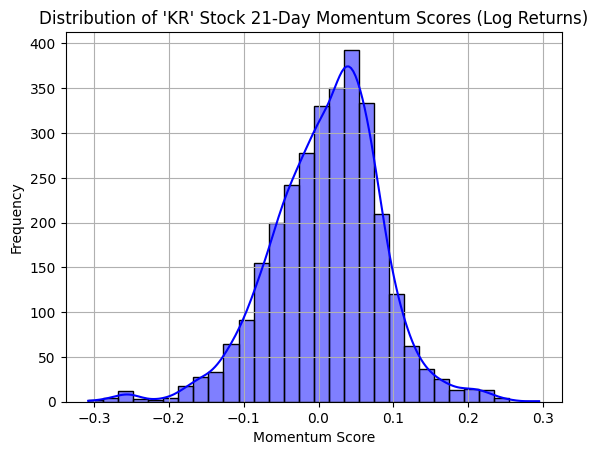

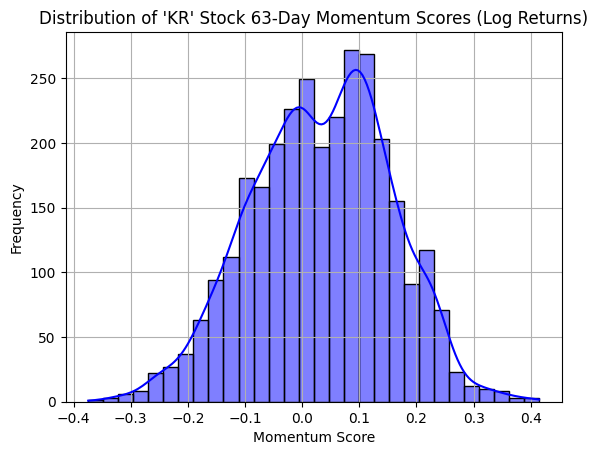

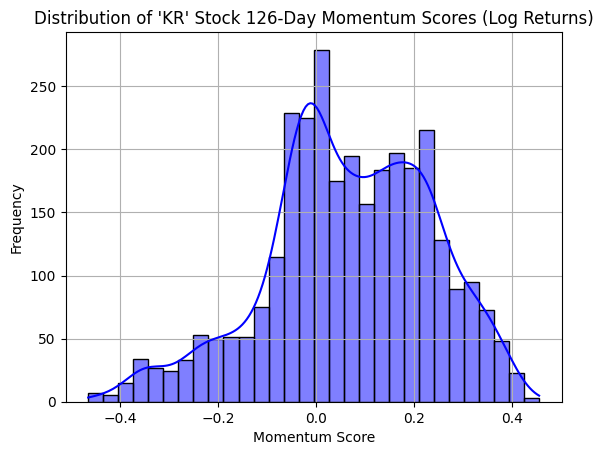

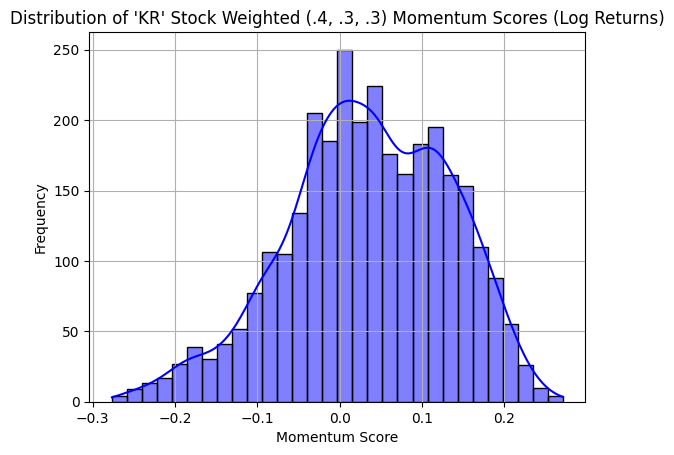

In [1]:
from example.lstm_strategy_new import *
from modules.load_data import load_data

dict_data = load_data()
sel_stocks = initial_analysis(dict_data)
print('Selected stocks:')
display(sel_stocks)

## Preparing data for model prediction

An example of 60-day windowed Dataframe

First plot presents the returns and second the log-returns

Maximum scale:  0.11079525947570801


,Target Date,Target-60,Target-59,Target-58,Target-57,Target-56,Target-55,Target-54,Target-53,Target-52,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target of Stock
0,2017-11-22,-0.002141,0.003091,0.018404,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,...,0.026334,0.000672,-0.001712,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858
1,2017-11-24,0.003091,0.018404,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,...,0.000672,-0.001712,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.004490
2,2017-11-27,0.018404,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,-0.007238,...,-0.001712,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.00449,-0.016077
3,2017-11-28,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,-0.007238,0.009583,...,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.00449,-0.016077,-0.012829
4,2017-11-29,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,-0.007238,0.009583,0.024845,...,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.00449,-0.016077,-0.012829,0.039126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2019-06-24,0.025294,0.016326,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,...,-0.008912,0.006654,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462
397,2019-06-25,0.016326,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,...,0.006654,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018
398,2019-06-26,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,0.026222,...,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018,-0.004600
399,2019-06-27,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,0.026222,0.008022,...,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018,-0.0046,0.007492


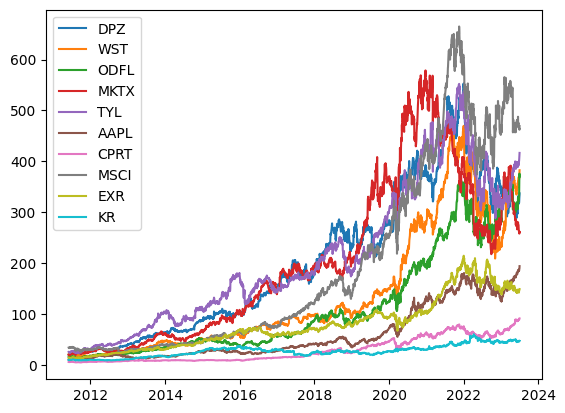

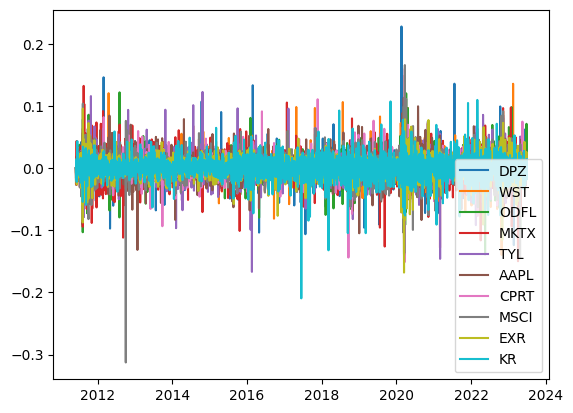

In [2]:
dfs_dict = prepare_model_data(sel_stocks, 2031)
dfs_dict['windowed_dfs']['DPZ']

## Stocks Wallet

Returns the wallet and the predicted returns. Shows the real returns just for comparison purpose.

The plots shows the returns predictions for the selected stocks.

In [18]:
mount_wallet(sel_stocks, dfs_dict)

TypeError: mount_wallet() missing 1 required positional argument: 'date'

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import example.lstm_strategy_new as lstm
from modules.strategy_simulator import strategy_simulator
from modules.load_data import load_data

dict_data = load_data()

# Set the path to the strategy and the strategy itself
path = "example/"  # Path to your strategy
strategy = lstm.lstm_strategy  # Your strategy

# Initialize data structures to store results
ret_port = pd.Series(dtype="float64")  # Series to store portfolio returns
weights_db = pd.DataFrame()  # DataFrame to store historical weights

# Loop through a range of time values
for t in tqdm(range(500, 501)): # t = 2031 corresponds to '2019-06-28', a bit before COVID-19. That is the date that will be used when more time to run the algorithm is available.
    # Use the strategy simulator to get portfolio's historical weights [weights_db]
    # and its next day returns [ret_port]
    ret_port, weights_db = strategy_simulator(path, strategy, dict_data, t, ret_port, weights_db)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vol_df[f'{column}'] = np.nan_to_num(log_returns[column].rolling(volatility_window).std())
c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  momentum_scores_21[f'{column}'] = np.nan_to_num(momentum_scores)
c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:56: P

In [2]:
display(pd.DataFrame(ret_port.values))
display(weights_db)

,0
0,0.01594


,Stock,Weights,Predicted Returns,Real Returns
2013-05-31,DPZ,0.2287,0.015511,0.008464
2013-05-31,WST,0.0000,-0.006141,0.016630
2013-05-31,ODFL,0.0000,-0.009642,0.002852
2013-05-31,MKTX,0.1379,0.009356,0.012475
2013-05-31,TYL,0.2935,0.019911,0.032796
2013-05-31,AAPL,0.0000,-0.006060,0.014493
2013-05-31,CPRT,0.0000,-0.015456,-0.004338
2013-05-31,MSCI,0.1675,0.011358,0.014375
2013-05-31,EXR,0.0721,0.004889,0.007106
2013-05-31,KR,0.1003,0.006804,-0.000695


In [3]:
import quantstats as qs
#Gerar Relatório HTML
tear_sheet = qs.reports.html(pd.DataFrame(ret_port.values),
                             benchmark="BVSP",
                             benchmark_title = "BVSP",
                             download_filename="lstm_strat.html",
                             title = "Portfolio Baixa Volatilidade e Alto Momento SP&500 - 10 ativos"
                             )

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BVSP']: Exception('%ticker%: No timezone found, symbol may be delisted')


AttributeError: 'Index' object has no attribute 'tz_localize'

In [8]:
x = ['A']*3
print(x)

['A', 'A', 'A']
